In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [6]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# VENOM THE LAST DANCE MOVIE REVIEW

In [8]:
r = requests.get('https://www.rottentomatoes.com/m/venom_the_last_dance/reviews')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*review-text.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [9]:
reviews

["Venom: The Last Dance sputters to an unsatisfying conclusion that will likely leave fans of the series wishing for something more. Tom Hardy may not quite be phoning it in, but it's clear the fire has gone. Please let this be the final dance. Please.",
 'A spectacular film... with a sentimental, emotional, and dramatic touch that was not expected in this departure(?) of the Lethal Protector. [Full review in Spanish]',
 "While there is some fun to be had (in particular in the 3rd act), the story is a mess.  Three movies into this trilogy, it's disappointing they never figured out how to craft film which is both fun and coherent.",
 'Marcel’s film has a ton of potential in a cast that’s clearly game and centered on a terrifically entertaining performance from Hardy. When it’s having fun, “The Last Dance” is infectiously delightful, but those moments are too far and few in between. ',
 'Tom Hardy clearly has a blast as Eddie/Venom and this final installment to the VENOM trilogy is hilar

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [12]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [13]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [14]:
df.head(100)

,review,sentiment
0,Venom: The Last Dance sputters to an unsatisfy...,2
1,"A spectacular film... with a sentimental, emot...",5
2,While there is some fun to be had (in particul...,3
3,Marcel’s film has a ton of potential in a cast...,3
4,Tom Hardy clearly has a blast as Eddie/Venom a...,5
5,"It is forced, and too formulaic to generate an...",1
6,"""The most romantic trilogy in cinema since the...",5
7,Venom The Last Dance is a chaotic road trip of...,2
8,Undoubtedly the weakest of the trilogy. Tom Ha...,2
9,Whether this Venom movie is irritating and inc...,2


In [15]:
### CHECKING ACCURACY OF SENTIMENT RESULTS

row = df[df['sentiment'] == 3]

print(row)

                                               review  sentiment
2   While there is some fun to be had (in particul...          3
3   Marcel’s film has a ton of potential in a cast...          3
12  The vaudeville-style quirky banter between Ven...          3
13  The Eddie / Venom dynamic is once again hilari...          3
14  As the closing chapter of this Venom trilogy, ...          3


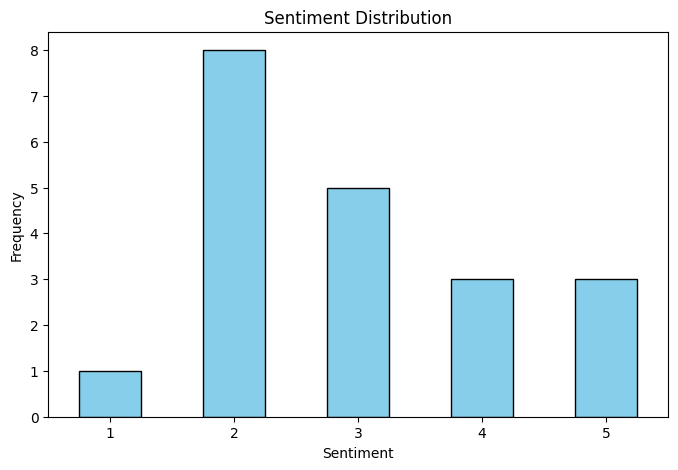

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


sentiment_counts = df['sentiment'].value_counts().sort_index()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [19]:
df.describe()

,sentiment
count,20.000000
mean,2.950000
std,1.190975
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# SUMMARY:
## 1. Average of 2.95 Sentiment value which is lower compared to other Marvel Sony Picture movies
## 2. Majority of the Sentiment value resulted to 2 only. Kindly see Sentiment Distribution Chart.
## 3. Sentiment values shows accurate rating of around 3, one sample of reviews: "Marcel’s film has a ton of potential in a cast that’s clearly game and centered on a terrifically entertaining performance from Hardy. When it’s having fun, “The Last Dance” is infectiously delightful, but those moments are too far and few in between."